script uses the Univariate Spline to extend the extrapolation, linearly, beyond the data range covered by the data
the data are downloaded from http://iupac.pole-ether.fr/htdocs/datasheets/doc/PBr9_br2+hv.doc

In [1]:
import pylab as plt
import numpy as np
from scipy.interpolate import InterpolatedUnivariateSpline

In [2]:
%matplotlib inline

In [3]:
data = plt.loadtxt('br2_xsections.dat', skiprows=1, delimiter=',')
x = data[:,0]
y = data[:,1]*1e-20 # since the data are stored as *1E20 in IUPAC

In [4]:
ius = InterpolatedUnivariateSpline(x, y, k=3)# k=1 -> linear extrapolation outside of range

In [5]:
fastJx = [187., 191., 193., 196., 202., 208., 211.,214.,261.,267.,277. ,295., 303., 310., 316., 333., 380., 574.]
fastJy = ius(fastJx)

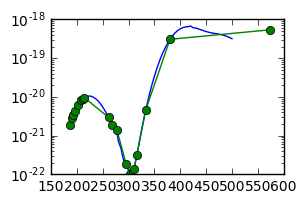

In [6]:
plt.figure(figsize=(3,2), dpi=100)
plt.hold(True)

plt.semilogy(x,y)
fastJy = fastJy.clip(0) # remove extrapolated values < 0
plt.semilogy(fastJx, fastJy, 'o-')